# <span style='color:#F76241'>|</span> Group 9 - AI Methods for Business </b>
### Statistical analysis of features that can predict movie world-wide box office
<br> David Andrew
<br> Melissa Dhanpal
<br> Sasha Köhler
<br> Maher Aarab

## <b>1<span style='color:#F76241'>|</span> Introduction

**<span style='color:#F76241'>Main Research question:</span>** </br>
What machine learning model does best predict future revenue of world box office sales? </br>

</br>**<span style='color:#F76241'>Sub Research questions:</span>** </br>

To what extent does the movie genre have an effect on movie revenues? </br>

To what extent does the choice of studio have an effect on movie revenues? </br>

To what extent do reviews have an effect on movie revenues? </br>

To what extent does the theater count have an effect on movie revenues? </br>



Variables: Studio, Genre, theatre count, reviews

</div>

In [2]:
# Importing the libraries
import pandas as pd #to manipulate our dataframe
import matplotlib.pyplot as plt #library to plot dataframe
import numpy as np #the statistics pack
import seaborn as sns
from sklearn.linear_model import LinearRegression #Linear regression library
from sklearn.linear_model import LogisticRegression #Logistic regression library
from statsmodels.stats.outliers_influence import variance_inflation_factor #This library is for feature selection
from sklearn.preprocessing import StandardScaler #Standardscaling library
from sklearn.ensemble import RandomForestRegressor #Random Forest Regressor Library
from sklearn import datasets, linear_model #Linera model library
from sklearn.model_selection import cross_val_score 
from plotnine import * #for showing the distribution of the Neural Network points
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve #
from sklearn.model_selection import PredefinedSplit, GridSearchCV #Gridsearch library for getting best parameters
import pickle
import json #
import os

### <b>1.1<span style='color:#F76241'>|</span> DataSet
The dataset for this project is a combination of movie sales, expert reviews, user reviews and a metacritic data. It shows information on different movies and their components. Based on the research focus stated above, we will do some data cleaning that will enable us define the a dataframe that is relevant to answering the main research question.

In [3]:
#Code by Sasha
#Reading three data sets
df1 = pd.read_csv("C:/Users/User/Dropbox/PC/Desktop/Masters DDB/AI Methods for Business/Final Assignment/sales.csv")
print('Original length of dataframe:', len(df1))
df2 = pd.read_csv("C:/Users/User/Dropbox/PC/Desktop/Masters DDB/AI Methods for Business/Final Assignment/meta Clean Brightspace.csv", encoding='latin-1')
print('Original length of dataframe:', len(df2))


Original length of dataframe: 30612
Original length of dataframe: 11364


### <b>1.2<span style='color:#F76241'>|</span>Reasons for Dropping Features
Year - The year of release is irrelvant because we are considering movie data across different years that all have same chance of a good performance.

International and Domestic Box office - The Worldwide box office is already a sum of the international and domestic box offices. As such, we are only keeping the worldwide box office as the feature to be predicted.

Opening Weekend - Since we are trying to predict the box office sales using features that are before the fact, we consider 'opening weekend' sales as an after the fact and therefrom irrelevant to our model.

Avg run per theatre - Since we are trying to predict the box office sales using features that are before the fact, we consider 'Avg run per theatre' sales as an after the fact and therefrom irrelevant to our model.

Runtime - Runtime for movies are mostly not a factor considered when consumers decide if they would see a movie as this is usually known when they eventually view the movie. Thus, we believe this is not a feature that contributes to movie sales.

Url - This url link is an online location of the movie thus irrelvant for prediction.

Keywords - This is a search parameter in the data and irrevant feature for prediction.

Summary - This is a descriptive parameter of each movie and irrelevant to our prediction research.

release_Date - This is a duplicate data and thus irrelevant.

awards - Awards indicates an event that indicates post movie release and dependent on movie performance. It cannot be used to predict movie sales, thus irrelevant to our research.

NB: In the process of our EDA, we further drop some other columns

In [4]:
#Code by Everyone
#delete columns with null data & irrelevant features based on the reasons above
del df1['Unnamed: 8']
del df1['year']
del df1['international_box_office']
del df1['domestic_box_office']
del df1['opening_weekend']
del df1['avg run per theatre']
del df1['runtime']
del df2['runtime']
del df1['url']
del df2['genre']
del df1['release_date']
del df1['keywords']
del df2['url']
del df2['summary']
del df2['awards']

In [5]:
#Code by Sasha
# using merge function from setting how='inner'
df = pd.merge(df1, df2, 
                   on='title', 
                   how='inner')
  
# displaying result
print(df.head())

                        title              genre  worldwide_box_office  \
0                   Antitrust  Thriller/Suspense            17865209.0   
1                    Santitos                NaN                   NaN   
2          A Walk to Remember              Drama            46060861.0   
3  The Killing of John Lennon              Drama                   NaN   
4                   Mad Money             Comedy            25044057.0   

   production_budget  theatre_count         creative_type  \
0         30000000.0         2433.0  Contemporary Fiction   
1                NaN            NaN                   NaN   
2         11000000.0         2411.0  Contemporary Fiction   
3                NaN            1.0         Dramatization   
4         22000000.0         2470.0  Contemporary Fiction   

                  studio   rating                                     cast  \
0       MGM Distribution  | PG-13               Ryan Phillippe,Tim Robbins   
1       New Yorker Films      | 

In [6]:
#Code by David
#categorising the Release Date from months
#adopted from https://stackoverflow.com/questions/73382504/how-to-call-the-month-from-dataframes-date-if-the-date-format-is-dd-mm-yyyy?newreg=d091136eacbb41ebac5bf4cbadad5d87
from pandas import DatetimeIndex
month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug',9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'} #defining month labels

df['RelDate'] = pd.DatetimeIndex(df['RelDate']).month #converting the date format from dd/mm/yyyy to just mm. better for categorising and analysis
x= df['RelDate'].apply(lambda x: month_labels[x])

df['rel_date'] = x #adding release date column to the dataframe

c:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '28/01/2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
c:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '25/01/2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
c:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '18/01/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
c:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '29/02/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
c:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '28/12/2011' in DD/MM/YYYY format. Provide form

In [7]:
#Code by David
df.head() #to check that the new column is now added

,title,genre,worldwide_box_office,production_budget,theatre_count,creative_type,studio,rating,cast,director,metascore,userscore,RelDate,rel_date
0,Antitrust,Thriller/Suspense,17865209.0,30000000.0,2433.0,Contemporary Fiction,MGM Distribution,| PG-13,"Ryan Phillippe,Tim Robbins",Peter Howitt,31,8.7,12,Dec
1,Santitos,NaN,NaN,NaN,NaN,NaN,New Yorker Films,| R,NaN,Alejandro Springall,68,NaN,1,Jan
2,A Walk to Remember,Drama,46060861.0,11000000.0,2411.0,Contemporary Fiction,Warner Bros. Pictures,| PG,"Mandy Moore,Shane West",Adam Shankman,35,8.3,1,Jan
3,The Killing of John Lennon,Drama,NaN,NaN,1.0,Dramatization,IFC Films,NaN,Jonas Ball,Andrew Piddington,49,6.4,2,Feb
4,Mad Money,Comedy,25044057.0,22000000.0,2470.0,Contemporary Fiction,Overture Films,| PG-13,"Diane Keaton,Katie Holmes,Queen Latifah",Callie Khouri,41,6.4,1,Jan


In [8]:
#Code by David
#Deleting the old "RelDate" column
del df["RelDate"]

## <b>2<span style='color:#F76241'>|</span> Exploratory Data Analysis

In [9]:
#Code by Sasha
#summarize dataset 
df.head()

,title,genre,worldwide_box_office,production_budget,theatre_count,creative_type,studio,rating,cast,director,metascore,userscore,rel_date
0,Antitrust,Thriller/Suspense,17865209.0,30000000.0,2433.0,Contemporary Fiction,MGM Distribution,| PG-13,"Ryan Phillippe,Tim Robbins",Peter Howitt,31,8.7,Dec
1,Santitos,NaN,NaN,NaN,NaN,NaN,New Yorker Films,| R,NaN,Alejandro Springall,68,NaN,Jan
2,A Walk to Remember,Drama,46060861.0,11000000.0,2411.0,Contemporary Fiction,Warner Bros. Pictures,| PG,"Mandy Moore,Shane West",Adam Shankman,35,8.3,Jan
3,The Killing of John Lennon,Drama,NaN,NaN,1.0,Dramatization,IFC Films,NaN,Jonas Ball,Andrew Piddington,49,6.4,Feb
4,Mad Money,Comedy,25044057.0,22000000.0,2470.0,Contemporary Fiction,Overture Films,| PG-13,"Diane Keaton,Katie Holmes,Queen Latifah",Callie Khouri,41,6.4,Jan


In [10]:
#droping the 'title' column
del df['title'] #droppped the "Title" 

In [11]:
# Code by David
# Checking for non-null values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9014 entries, 0 to 9013
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genre                 8625 non-null   object 
 1   worldwide_box_office  5836 non-null   float64
 2   production_budget     3678 non-null   float64
 3   theatre_count         7046 non-null   float64
 4   creative_type         8275 non-null   object 
 5   studio                8791 non-null   object 
 6   rating                8377 non-null   object 
 7   cast                  6415 non-null   object 
 8   director              9005 non-null   object 
 9   metascore             9014 non-null   int64  
 10  userscore             7604 non-null   float64
 11  rel_date              9014 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 915.5+ KB


In [12]:
#Code by David
#Checking how many null values are present in the data set
print(df.isnull().sum())

genre                    389
worldwide_box_office    3178
production_budget       5336
theatre_count           1968
creative_type            739
studio                   223
rating                   637
cast                    2599
director                   9
metascore                  0
userscore               1410
rel_date                   0
dtype: int64


Looking at the the data above, we can see that only Release date, title and metascore have complete data with no null values. Hence we have the option of either dropping the null values or inputting generated data. We chose to do the latter because we attempted to drop the null values and it left us with just *2902* rows out of the total *9014* rows which is just too much valuable data lost. Also we will drop the *'production budget'* column because about two-third of the data are null.

In [13]:
# Code by David
# Deleting production budget due to insufficient data
del df['production_budget']

In [14]:
#Code by Sasha
#The SimpleImputer class also supports categorical data represented as string values or pandas categoricals when using the 'most_frequent' or 'constant' strategy

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent',
                        missing_values=np.nan)
imputer = imputer.fit(df)
df.iloc[:,:] = imputer.transform(df)
print()

In [15]:
# Code by Sasha
#Validatiing that the null values have been replaced
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9014 entries, 0 to 9013
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genre                 9014 non-null   object 
 1   worldwide_box_office  9014 non-null   float64
 2   theatre_count         9014 non-null   float64
 3   creative_type         9014 non-null   object 
 4   studio                9014 non-null   object 
 5   rating                9014 non-null   object 
 6   cast                  9014 non-null   object 
 7   director              9014 non-null   object 
 8   metascore             9014 non-null   int64  
 9   userscore             9014 non-null   float64
 10  rel_date              9014 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 845.1+ KB


In [16]:
#Code by David
# Converting columns with 'float' datatype to integer type
for i in [x for x in df.columns if x not in ['title', 'creative_type', 'studio', 'rating', 'cast', 'director', 'genre', 'rel_date'] ]:
    df[i]= df[i].astype('int64')
df.dtypes

genre                   object
worldwide_box_office     int64
theatre_count            int64
creative_type           object
studio                  object
rating                  object
cast                    object
director                object
metascore                int64
userscore                int64
rel_date                object
dtype: object

In [17]:
#Code by Maher
#show descriptive statistics analyze
df.describe()

,worldwide_box_office,theatre_count,metascore,userscore
count,9.014000e+03,9014.000000,9014.000000,9014.000000
mean,4.689537e+07,797.160084,56.807300,6.210339
std,1.410069e+08,1293.491254,17.075524,1.335997
min,1.200000e+01,1.000000,1.000000,0.000000
25%,3.053000e+03,1.000000,45.000000,6.000000
50%,5.931285e+05,4.000000,58.000000,7.000000
75%,2.634214e+07,1709.250000,70.000000,7.000000
max,2.845900e+09,4725.000000,100.000000,9.000000


array([[<AxesSubplot:title={'center':'worldwide_box_office'}>,
        <AxesSubplot:title={'center':'theatre_count'}>],
       [<AxesSubplot:title={'center':'metascore'}>,
        <AxesSubplot:title={'center':'userscore'}>]], dtype=object)

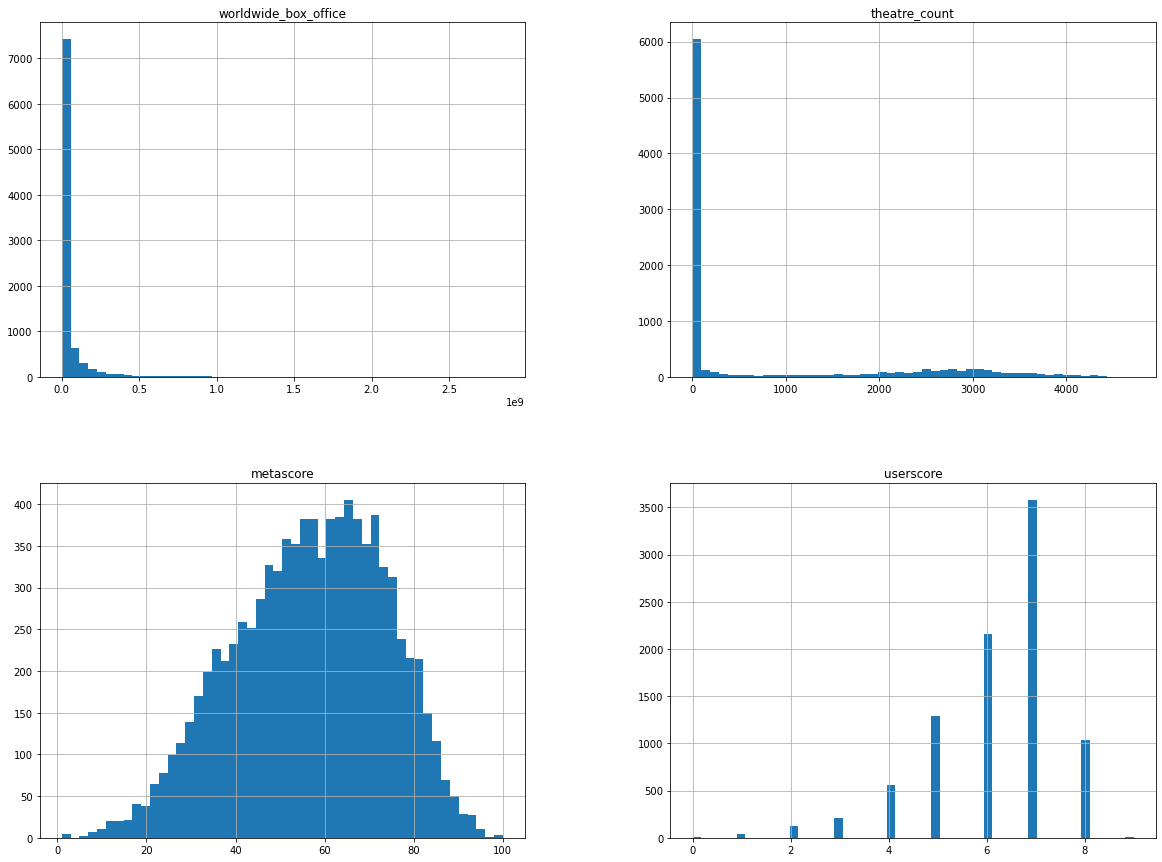

In [18]:
#Code by Maher
#Visualize data in an overview
df.hist(bins=50, figsize=(20,15))

### <b>2.1<span style='color:#F76241'>|</span>Correlation Analysis

In [19]:
#Code by David
#re-arranging our dataframe for better understanding
df = df[['theatre_count', 'metascore', 'userscore', 'rel_date', 'creative_type', 'studio', 'rating', 'cast', 'director', 'genre', 'worldwide_box_office']]

In [20]:
# Code by Sasha
# Correlation model useing the cor function for pearson correlation
corr = df.corr(method='spearman')
# Plot the table with Green template
corr.style.background_gradient(cmap='YlGn')

,theatre_count,metascore,userscore,worldwide_box_office
theatre_count,1.000000,-0.222556,-0.120473,0.722799
metascore,-0.222556,1.000000,0.416359,-0.052630
userscore,-0.120473,0.416359,1.000000,-0.067547
worldwide_box_office,0.722799,-0.052630,-0.067547,1.000000


In [21]:
#Code by Sasha & David
# defining the continuous and categorical feature variables
cont_var = ['theatre_count', 'metascore', 'userscore', 'worldwide_box_office']
cont_features = ['theatre_count','metascore', 'userscore', 'opening_weekend']
nominal_var = ['creative_type', 'studio', 'genre', 'cast', 'director']
ordinal_var = ['rating', 'rel_date']


#### <b>2.1.1<span style='color:#F76241'>|</span>Categorical Feature Analysis

In [22]:
# Code by David
#Exploring the structure of the nominal categorical variables
df[nominal_var].describe()

,creative_type,studio,genre,cast,director
count,9014,9014,9014,9014,9014
unique,9,869,13,5909,4765
top,Contemporary Fiction,IFC Films,Drama,"Astrid Roos,Barbara Hellemans,DaphnÃ© Huynh,Gu...",Michael Winterbottom
freq,4980,559,3215,2604,30


In [23]:
#Code by David
df[ordinal_var].describe() #describing the ordinal variables

,rating,rel_date
count,9014,9014
unique,17,12
top,| R,Sept
freq,3794,874


In [24]:
#Code by David
pd.value_counts(df.rel_date) #frequency of months on dataset

Sept    874
Oct     843
Mar     793
Aug     780
Nov     774
July    770
June    765
Dec     737
Apr     731
May     678
Jan     643
Feb     626
Name: rel_date, dtype: int64

In [25]:
#Code by David
# Exploring the names of categories within the genre feature
print(df['genre'].unique()) #This is to display the categories within the feature genre feature

['Thriller/Suspense' 'Drama' 'Comedy' 'Action' 'Adventure' 'Documentary'
 'Black Comedy' 'Musical' 'Horror' 'Romantic Comedy' 'Western'
 'Concert/Performance' 'Multiple Genres']


In [26]:
#Code by David
pd.value_counts(df.genre) #exploring the frequency of the genre to know the top 5 genres

Drama                  3215
Documentary            1373
Comedy                 1225
Thriller/Suspense       898
Action                  595
Horror                  542
Adventure               534
Romantic Comedy         316
Black Comedy            144
Musical                  76
Western                  57
Concert/Performance      29
Multiple Genres          10
Name: genre, dtype: int64

In [27]:
#Code by Maher
##Exploring the names of categories within the genre feature
print(df['studio'].unique()) #This is to display the categories within the feature genre feature

['MGM Distribution' 'New Yorker Films' 'Warner Bros. Pictures' 'IFC Films'
 'Overture Films' 'New Line Cinema' 'Columbia Pictures' 'Focus Features'
 'Walt Disney Studios Motion Pictures' 'Magnolia Home Entertainment'
 'Summit Entertainment' 'Music Box Films'
 'Twentieth Century Fox Film Corporation' 'First Run Features'
 'Sony Pictures Classics' 'Paladin (II)' 'Open Road Films' 'Netflix'
 'Annapurna Pictures' 'Lionsgate' 'Drafthouse Films' 'ARP SÃ©lection'
 'Shout! Factory' 'Sony Pictures Entertainment (SPE)' 'Warner Bros.'
 'Angel Films' 'Samuel Goldwyn Films'
 'Entertainment Studios Motion Pictures' 'Lionsgate Home Entertainment'
 'Paramount Pictures' 'Universal Pictures' 'Neon' 'STX Entertainment'
 'A24' 'Magnolia Pictures' 'The Orchard' 'Les Films du Losange'
 'Broad Green Pictures' 'Millennium Films' 'Dark Star Pictures'
 'Amazon Studios' 'Culture Publishers (CP)' 'Tugg' 'Screen Media Films'
 'Fox Searchlight Pictures' 'Zeitgeist Films' 'Cinema Slate'
 'Metro-Goldwyn-Mayer (MGM)' 

In [28]:
# Code by Maher
# pd.value_counts(df.studio) #exploring the frequency of the studios to know the top 5 genres

In [29]:
#Code by Maher
print(df['creative_type'].unique()) #This is to display the categories within the feature creative_type feature

['Contemporary Fiction' 'Dramatization' 'Fantasy' 'Historical Fiction'
 'Science Fiction' 'Kids Fiction' 'Factual' 'Super Hero'
 'Multiple Creative Types']


In [30]:
#Code by Maher
pd.value_counts(df.creative_type) #exploring the frequency of the creative type to know the top 6 genres

Contemporary Fiction       4980
Factual                    1375
Historical Fiction          741
Dramatization               699
Science Fiction             467
Fantasy                     375
Kids Fiction                276
Super Hero                   96
Multiple Creative Types       5
Name: creative_type, dtype: int64

In [31]:
#Code by Maher
pd.value_counts(df.director) #exploring the frequency of the creative type to know the top directors

Michael Winterbottom    30
Steven Soderbergh       19
Woody Allen             19
Clint Eastwood          19
Ridley Scott            18
                        ..
Robert D. Siegel         1
Steve Lawrence           1
Vicky Jenson             1
Doug Nichol              1
Glendyn Ivin             1
Name: director, Length: 4765, dtype: int64

In [32]:
#Code by Maher
pd.value_counts(df.studio) #exploring the frequency of the creative type to know the top studios

IFC Films                                559
Universal Pictures                       324
Warner Bros. Pictures                    282
Sony Pictures Classics                   265
Paramount Pictures                       254
                                        ... 
Big Mouth Productions                      1
Village Roadshow Entertainment             1
A Bigger Boat                              1
BBC Worldwide Americas                     1
American International Pictures (AIP)      1
Name: studio, Length: 869, dtype: int64

In [33]:
#Code by Maher
pd.value_counts(df.cast) #exploring the frequency of the creative type to know the top casts

Astrid Roos,Barbara Hellemans,DaphnÃ© Huynh,Guillaume Kerbusch,Hana Sofia Lopes,Henry Rollins,Juliette Lewis,Lisa Houle,Morgan Csarno-Peklar,StÃ©phane Bissot,Stephen McHattie,Themis Pauwels,TÃ³mas Lemarquis                                       2604
Darby Camp,Finn Cole,Garrett Hedlund,Ginger T. Rex,Grayson Berry,Hans Christopher,Jacob Browne,Jane Wilson,Joe Berryman,Kerry Condon,Krista Bradley,Lola Kirke,Margot Robbie,Pab Schwendimann,Stephen Dinh,Tim Janis,Travis Fimmel                      5
Brenton Thwaites,David Zayas,Helen Hunt,Luke Wilson,Robert Knepper                                                                                                                                                                                      5
Alisha B. Woods,Ashlie Atkinson,Chloe Levine,Colton Ryan,Dana Aliya Levinson,Gracie Lawrence,Haley Murphy,India Menuez,Jari Jones,Julia Weldon,Leo Sheng,Margaret Qualley,Maxton Miles Baeza,Mj Rodriguez,Nicholas Alexander,Susanne Marie Danger       4


As seen from the analysis above, the data has over 4700 unique director columns and if we select just the top 5, we will be losing a lot more data on the less frequent occuring directors. Thus we will drop the director column.

#### <b>2.1.2<span style='color:#F76241'>|</span> Kruskal-Wallis H tests on the nominal to continious variable correlation analysis

In [34]:
#Code by David - code adopted from Ricardo
# Getting data for each nomical variable segments
## Based on the category frequency analysis above, We are only computing the relationship using the top five categories of each feature

#genre
comedy_ww_box_office = df[df['genre'] =='Comedy']['worldwide_box_office'].values
drama_ww_box_office = df[df['genre'] =='Drama']['worldwide_box_office'].values
thriller_Suspense_ww_box_office = df[df['genre'] =='Thriller/Suspense']['worldwide_box_office'].values
documentary_ww_box_office = df[df['genre'] =='Documentary']['worldwide_box_office'].values
action_ww_box_office = df[df['genre'] =='Action']['worldwide_box_office'].values

#creative type
Contemporary_Fiction_ww_box_office = df[df['creative_type'] =='Contemporary Fiction']['worldwide_box_office'].values
Dramatization_ww_box_office = df[df['creative_type'] =='Dramatization']['worldwide_box_office'].values
Fantasy_ww_box_office = df[df['creative_type'] =='Fantasy']['worldwide_box_office'].values
historical_fiction_ww_box_office = df[df['creative_type'] =='Historical Fiction']['worldwide_box_office'].values
science_fiction_ww_office = df[df['creative_type'] =='Science Fiction']['worldwide_box_office'].values

#Director 
Michael_Winterbottom_ww_box_office = df[df['director'] =='Woody Allen']['worldwide_box_office'].values
Steven_Soderbergh_ww_box_office = df[df['director'] =='Steven Soderbergh']['worldwide_box_office'].values
Woody_Allen_ww_box_office = df[df['director'] =='Woody Allen']['worldwide_box_office'].values
Clint_Eastwood_ww_box_office = df[df['director'] =='Clint Eastwood']['worldwide_box_office'].values
Ridley_Scott_ww_box_office = df[df['director'] =='Ridley Scott']['worldwide_box_office'].values

#Studio 
IFC_Films_ww_box_office = df[df['studio'] =='IFC Films']['worldwide_box_office'].values
Universal_Pictures_ww_box_office = df[df['studio'] =='Universal Pictures']['worldwide_box_office'].values
Warner_Bros_Pictures_ww_box_office = df[df['studio'] =='Warner Bros. Pictures']['worldwide_box_office'].values
Sony_Pictures_Classics_ww_box_office = df[df['studio'] =='Sony Pictures Classics']['worldwide_box_office'].values
Paramount_Pictures_ww_box_office = df[df['studio'] =='Paramount Pictures']['worldwide_box_office'].values

# Kruskal-Wallis H tests
import scipy.stats as stats

alpha = 0.1

test_stat, p_val = stats.kruskal(comedy_ww_box_office, drama_ww_box_office, thriller_Suspense_ww_box_office, documentary_ww_box_office, action_ww_box_office)
print('The p-value for Kruskal-Wallis H test for genre:', p_val)

test_stat, p_val = stats.kruskal(Contemporary_Fiction_ww_box_office, Dramatization_ww_box_office, Fantasy_ww_box_office, historical_fiction_ww_box_office, science_fiction_ww_office)
print('The p-value for Kruskal-Wallis H test for creative type:', p_val)

test_stat, p_val = stats.kruskal(Michael_Winterbottom_ww_box_office, Steven_Soderbergh_ww_box_office, Woody_Allen_ww_box_office, Clint_Eastwood_ww_box_office, Ridley_Scott_ww_box_office)
print('The p-value for Kruskal-Wallis H test for director:', p_val)

test_stat, p_val = stats.kruskal(IFC_Films_ww_box_office, Universal_Pictures_ww_box_office, Warner_Bros_Pictures_ww_box_office, Sony_Pictures_Classics_ww_box_office, Paramount_Pictures_ww_box_office)
print('The p-value for Kruskal-Wallis H test for studio:', p_val)

The p-value for Kruskal-Wallis H test for genre: 1.5385144814484557e-262
The p-value for Kruskal-Wallis H test for creative type: 1.6317922591313493e-72
The p-value for Kruskal-Wallis H test for director: 0.0001648419370287396
The p-value for Kruskal-Wallis H test for studio: 5.87275397166272e-191


From the above Kruskal-Wallis H test we can see that:
- the p-value for *genre* is very high ($ << \alpha = 0.1$), this implies that statistically, the mean of worldwide box office between the different genres are very different. 
- the p-value for *creative type* is very low ($ << \alpha = 0.1$), this implies that statistically, the mean of worldwide box office between the different creative types are very different.
- the p-value for *director* is at the limit ($ < \alpha = 0.1$), this implies that statistically, the mean of worldwide box office between top 5 directors are different.
- the p-value for *studios* is very low ($ << \alpha = 0.1$), this implies that statistically, the mean of worldwide box office between thebetween top 5 studios are very different.
<br>
- Based on the categorical feature and correlation analysis above, the data has over 4700 unique directors and if we select just the top 5, we will be losing a lot more data on the less frequent occuring directors. Thus we will drop the director column.
- the above also applies for the casts as they have 5909 unique casts and for the same reason, we decided to drop the casts column.

#### <b>2.1.3<span style='color:#F76241'>|</span> Cramer's V tests for Nominal to Nominal associations

In [35]:
#Code by David - code adopted from Ricardo Pinosio
## Cramer's V tests ##
######################
import scipy.stats as stats

def cramersV(contingency_table):
    '''
    Function to compute Cramer's V test statistic.
    Parameters:
    -----------
    contingency_table: numpy array,
                       contingency table for the two nomial variables.
    
    Returns:
    --------
    Cramer's V value: float
    '''
    # Comptuing the Chi-squared test statistic, sample size, and degrees of freedom
    X2 = stats.chi2_contingency(contingency_table, correction=False)[0]
    N = np.sum(contingency_table)
    dof = min(contingency_table.shape)-1
    # Calculate Cramer's V
    cramerV = np.sqrt((X2/N) /dof)

    return cramerV


# Creating contingency tables for genre, creative_type and region with insured, which will be used in the cramersV function defined above.
contigency_genre = pd.crosstab(index=df['genre'], columns=df['creative_type']).values
contigency_creative_type = pd.crosstab(index=df['creative_type'], columns=df['director']).values
contigency_director = pd.crosstab(index=df['director'], columns=df['genre']).values

print("The Cramér's V value for genre and creative type", cramersV(contigency_genre))
print("The Cramér's V value for creative type and director", cramersV(contigency_creative_type))
print("The Cramér's V value for director and genre", cramersV(contigency_director))

The Cramér's V value for genre and creative type 0.4781228354000084
The Cramér's V value for creative type and director 0.7383226625604539
The Cramér's V value for director and genre 0.7708446497955393


In [36]:
#Code by David
#Dropping casts and Directors columns due to too many sub categories
del df['director']
del df['cast']

## <b>3<span style='color:#F76241'>|</span> Feature Engineering

### <b>3.1<span style='color:#F76241'>|</span>Categorical variable encoding

In [37]:
#Code by David - code adopted from Ricardo Pinosio
#creating a new category for the "genre" feature
df['genre_list'] = df['genre'].str.split(',') 
main_genres = ['Comedy', 'Drama', 'Thriller', 'Documentary', 'Action'] #defining the major genres based on their frequency of occurrence

is_comedy_col = [] #new comedy column
is_drama_col = [] #new drama column
is_thriller_col = [] #new thriller column
is_documentary_col = [] #new documentary column
is_action_col = [] #new action column
is_other_col = [] #column containing any other genre besides the main genres

for genre_list in df['genre_list']:
      try:
            n_genres = len(genre_list)
            is_comedy = 'Comedy' in genre_list
            is_drama = 'Drama' in genre_list
            is_thriller = 'Thriller' in genre_list
            is_documentary = 'Documentary' in genre_list
            is_romance = 'Action' in genre_list
            other_genres = [x for x in genre_list if x not in main_genres]
            n_other_genres = len(other_genres)
            is_comedy_col.append(is_comedy)
            is_drama_col.append(is_drama)
            is_thriller_col.append(is_thriller)
            is_documentary_col.append(is_documentary)
            is_action_col.append(is_romance)
            is_other_col.append(n_other_genres)
      except:
            n_genres.append(0)
            is_comedy_col.append(False)
            is_drama_col.append(False)
            is_thriller_col.append(False)
            is_documentary_col.append(False)
            is_action_col.append(False)
            is_other_col.append(False)

df['is_comedy'] = is_comedy_col
df['is_drama'] = is_drama_col
df['is_thriller'] = is_thriller_col
df['is_documentary'] = is_documentary_col
df['is_action'] = is_action_col
df['is_other_genre'] = is_other_col

# convert from true/false to 1/0 from changing the types
df['is_comedy'] = df['is_comedy'].astype('int64') 
df['is_drama'] = df['is_drama'].astype('int64') 
df['is_thriller'] = df['is_thriller'].astype('int64') 
df['is_documentary'] = df['is_documentary'].astype('int64')
df['is_action'] = df['is_action'].astype('int64')

In [38]:
#Code by David - code adopted from Ricardo Pinosio
#creating a new category for the "studio" feature and its dummy variables
df['studio_list'] = df['studio'].str.split(',') 
main_studios = ['IFC Films', 'Universal Pictures', 'Warner Bros. Pictures', 'Sony Pictures Classics', 'Paramount Pictures'] #defining the major genres based on their frequency of occurrence

#New Studio Columns
is_ifc_films_col = []
is_universal_pictures_col = []
is_warner_bros_col = []
is_sony_pictures_col = []
is_paramount_pictures_col = []
is_other_col = []

for studio_list in df['studio_list']:
      try:
            n_studio = len(studio_list)
            is_ifc_films = 'IFC Films' in studio_list
            is_universal_pictures = 'Universal Pictures' in studio_list
            is_warner_bros = 'Warner Bros. Pictures' in studio_list
            is_sony_pictures = 'Sony Pictures Classics' in studio_list
            is_paramount_pictures = 'Paramount Pictures' in studio_list
            other_studios = [x for x in studio_list if x not in main_studios]
            n_other_genres = len(other_studios)
            is_ifc_films_col.append(is_ifc_films)
            is_universal_pictures_col.append(is_universal_pictures)
            is_warner_bros_col.append(is_warner_bros)
            is_sony_pictures_col.append(is_sony_pictures)
            is_paramount_pictures_col.append(is_paramount_pictures)
            is_other_col.append(n_other_genres)
      except:
            n_studio.append(0)
            is_ifc_films_col.append(False)
            is_universal_pictures_col.append(False)
            is_warner_bros_col.append(False)
            is_sony_pictures_col.append(False)
            is_paramount_pictures_col.append(False)
            is_other_col.append(False)

df['is_ifc_films'] = is_ifc_films_col
df['is_universal_pictures'] = is_universal_pictures_col
df['is_warner_bros'] = is_warner_bros_col
df['is_sony_pictures'] = is_sony_pictures_col
df['is_paramount_pictures'] = is_paramount_pictures_col
df['is_other_studios'] = is_other_col

# convert from true/false to 1/0 from changing the types
df['is_ifc_films'] = df['is_ifc_films'].astype('int64')
df['is_universal_pictures'] = df['is_universal_pictures'].astype('int64') 
df['is_warner_bros'] = df['is_warner_bros'].astype('int64') 
df['is_sony_pictures'] = df['is_sony_pictures'].astype('int64')
df['is_paramount_pictures'] = df['is_paramount_pictures'].astype('int64')

In [39]:
#Code by David
df.head() #exploring updated dataframe

,theatre_count,metascore,userscore,rel_date,creative_type,studio,rating,genre,worldwide_box_office,genre_list,...,is_documentary,is_action,is_other_genre,studio_list,is_ifc_films,is_universal_pictures,is_warner_bros,is_sony_pictures,is_paramount_pictures,is_other_studios
0,2433,31,8,Dec,Contemporary Fiction,MGM Distribution,| PG-13,Thriller/Suspense,17865209,[Thriller/Suspense],...,0,0,1,[MGM Distribution],0,0,0,0,0,1
1,1,68,7,Jan,Contemporary Fiction,New Yorker Films,| R,Drama,3053,[Drama],...,0,0,0,[New Yorker Films],0,0,0,0,0,1
2,2411,35,8,Jan,Contemporary Fiction,Warner Bros. Pictures,| PG,Drama,46060861,[Drama],...,0,0,0,[Warner Bros. Pictures],0,0,1,0,0,0
3,1,49,6,Feb,Dramatization,IFC Films,| R,Drama,3053,[Drama],...,0,0,0,[IFC Films],1,0,0,0,0,0
4,2470,41,6,Jan,Contemporary Fiction,Overture Films,| PG-13,Comedy,25044057,[Comedy],...,0,0,0,[Overture Films],0,0,0,0,0,1


In [40]:
#Code by David
#deleting cast because there are too many sub-categories within the categories to analyse
del df['studio']
del df['genre']
del df['rating']
del df['genre_list']
del df['studio_list']
del df['creative_type']

### <b>3.2<span style='color:#F76241'>|</span>Checking Multi-Collinearity from VIF
 Before building our model, we want to try to avoid multicollinearity from using the Variance Inflator Factor(VIF) function to get rid of the most correlated independent variables. 
ref: https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b

In [41]:
#Code by David
#Calculating the VIF values
#importng libraries for the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(considered_features):
    x = df[considered_features].copy()
    x['intercept'] = 1 # the calculation of variance inflation requires a constant
    vif = pd.DataFrame()
    vif['Variable'] = x.columns
    vif['VIF_Value'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

In [42]:
#Code by David 
#The considered factors are the independent variables we want to compute the VIF Values for-----
considered_features = ['theatre_count', 'metascore', 'userscore', 'is_comedy', 'is_drama', 'is_thriller', 'is_documentary', 'is_action', 'is_ifc_films', 'is_universal_pictures', 'is_warner_bros', 'is_sony_pictures', 'is_paramount_pictures']
#'theatre_count', 'metascore', 'userscore', 'is_comedy', 'is_drama', 'is_thriller', 'is_documentary', 'is_action', 'is_other_genre', 'is_ifc_films', 'is_universal_pictures', 'is_warner_bros', 'is_sony_pictures', 'is_paramount_pictures', 'is_other_studios'
compute_vif(considered_features).sort_values('VIF_Value', ascending=False)

c:\Users\User\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars


,Variable,VIF_Value
13,intercept,29.449418
4,is_drama,1.692423
6,is_documentary,1.590433
0,theatre_count,1.565347
1,metascore,1.406578
3,is_comedy,1.292275
2,userscore,1.275388
7,is_action,1.173482
9,is_universal_pictures,1.086443
10,is_warner_bros,1.084585


From the above we can see that all features have VIF values that are less than 5 and thus from general convention, even if not a rule, that the selected features do not have a VIF value of >5

In [43]:
#Code by Sasha
# Getting some basic statistics and information
meta_90 = len(df[df['metascore'] > 90])
print('Number of movies with higher metascrore than 90 is', meta_90)

worldwide_box_office= len(df[df['worldwide_box_office'] >= 1000000000])
print('Number of movies with revenue above a billion dollar: ', worldwide_box_office)


Number of movies with higher metascrore than 90 is 71
Number of movies with revenue above a billion dollar:  38


In [44]:
#Exploring the updated dataframe with added columns
df.head()

,theatre_count,metascore,userscore,rel_date,worldwide_box_office,is_comedy,is_drama,is_thriller,is_documentary,is_action,is_other_genre,is_ifc_films,is_universal_pictures,is_warner_bros,is_sony_pictures,is_paramount_pictures,is_other_studios
0,2433,31,8,Dec,17865209,0,0,0,0,0,1,0,0,0,0,0,1
1,1,68,7,Jan,3053,0,1,0,0,0,0,0,0,0,0,0,1
2,2411,35,8,Jan,46060861,0,1,0,0,0,0,0,0,1,0,0,0
3,1,49,6,Feb,3053,0,1,0,0,0,0,1,0,0,0,0,0
4,2470,41,6,Jan,25044057,1,0,0,0,0,0,0,0,0,0,0,1


In [45]:
#Code by David
del df['rel_date'] #Deleting too the release date column because it is not useful at this point

In [46]:
#Code by Sasha
#defining the train_test_split dataframe
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2)

### <b>3.3<span style='color:#F76241'>|</span>Standardizing Dataset

In [47]:
#Transforming or standardizing our independent variables
#Code by David

#Defining our standardized dataframe. We will use this particular dataframe in computing our models.
#First we want to seperate the dummy variables from the main categorical variables.

#defining our dummy variable columns and the continious variable columns
dummy_columns = ['is_comedy', 'is_drama', 'is_thriller', 'is_documentary', 'is_action', 'is_other_genre', 'is_ifc_films', 'is_universal_pictures', 'is_warner_bros', 'is_sony_pictures', 'is_paramount_pictures', 'is_other_studios']
cont_var_columns = ['theatre_count', 'metascore', 'userscore']
target_var = ['worldwide_box_office']

#converting the features to numpy arrays
cont_var_feature = df_train[cont_var_columns].values
dummy_feature = df_train[dummy_columns].values
target_feature = df_train[target_var].values

#defining the standard scalar
scaler = StandardScaler()

#scaling the continious features
predictors_scaled = scaler.fit_transform(cont_var_feature)
#scaling the target features
target_train_scaled = scaler.fit_transform(target_feature)

# Now joining both the scaled continious features and the dummy feature back into one dataframe
df_train_scaled = np.concatenate((predictors_scaled, dummy_feature), axis=1)

In [48]:
#Code by David
#TEST SET
#Defining and standardizing the test set
cont_var_test_feature = df_test[cont_var_columns].values
dummy_test_feature = df_test[dummy_columns].values
target_test_feature = df_test[target_var].values

#scaling the continious features
predictors_test_scaled = scaler.fit_transform(cont_var_test_feature)
#scaling the target features
target_test_scaled = scaler.fit_transform(target_test_feature)
# Now joining both the scaled continious features and the dummy feature back into one dataframe
df_test_scaled = np.concatenate((predictors_test_scaled, dummy_test_feature), axis=1)

x_test = df_test_scaled 
y_test = target_test_scaled
print(x_test.shape)

(1803, 15)



## <b>4 <span style='color:#F76241'>|</span> Random Forest Models </b>


In [49]:
#Code by David & Sasha
# create Training and Validation data set

y_fit = target_train_scaled
x_fit = df_train_scaled
y_fit =np.ravel(y_fit) #changing the the dimension of the array to a flattened contigious array
x_fit_train, x_val, y_fit_train, y_val = train_test_split(x_fit, y_fit, test_size=0.2)

print(x_fit_train.shape)
print(x_val.shape)

print(y_fit_train.shape)
print(y_val.shape)

(5768, 15)
(1443, 15)
(5768,)
(1443,)


In [50]:
#Code by Sasha
# import Random forest Regressor
rf_model = RandomForestRegressor(n_estimators=20)

rf_model.fit(x_fit_train, y_fit_train)

RandomForestRegressor(n_estimators=20)

In [51]:
#Code by Sasha
#Model for X and Y test
rf_model.score(x_fit_train, y_fit_train)

0.94121385995284

In [52]:
#Code by Sasha
# predict Y based on x input
y_predicted = rf_model.predict(x_fit_train)
print(y_predicted)

[-0.33943599 -0.27969817 -0.33955977 ... -0.34029641 -0.33256898
  0.05668463]


In [140]:
#Code by Sasha
#list of n_estimators, this code runs > 5 min*
estimator_range = range(10, 310, 10)

RMSE_scores = []

# 5-fold cross-validation with any value of n_estimators
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=123)
    MSE_scores = cross_val_score(rfreg, x_fit, y_fit, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0, 0.5, 'RMSE (lower is better)')

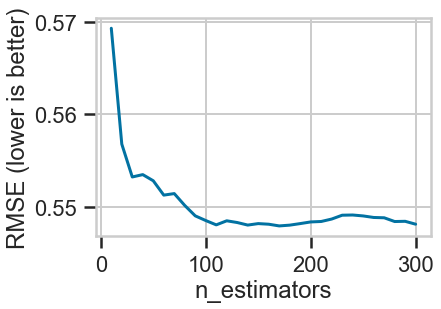

In [142]:
#Code by Sasha
#plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

In [55]:
#Code by Sasha
# import Random forest Regressor and as seen above we take n = 100
model = RandomForestRegressor(n_estimators=100, random_state = 42)
model.fit(x_fit_train, y_fit_train)

RandomForestRegressor(random_state=42)

In [56]:
#Code by Sasha
#Model for X and Y test
model.score(x_val, y_val)

0.6442694875024274

In [57]:
#Code by Sasha
#Predict Y based on x input
y_predicted = model.predict(x_val)

#The predicted regression target of an input sample is computed as the mean predicted regression targets of the trees.
print(y_predicted)


[-0.33536315 -0.34029985 -0.31415616 ... -0.30034357 -0.34020667
 -0.33882013]


In [58]:
#Code by Sasha
from sklearn import metrics

# R2 corresponds to the squared correlation between the observed outcome values. Higher the R-squared, the better the model.
print('R^2:', metrics.r2_score(y_val, y_predicted))

# It assesses the average squared difference between the observed and predicted
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_val, y_predicted))

# The lower the RMSE, the better the model. measures the average error in predicting the outcome for an observation.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_val, y_predicted, squared=False))

# absolute difference between observed and predicted outcomes. MAE is less sensitive to outliers compared to RMSE.
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_val, y_predicted))

R^2: 0.6442694875024274
Mean Squared Error (MSE): 0.41394605323539013
Root Mean Squared Error (RMSE): 0.6433863949722516
Mean Absolute Error (MAE): 0.21686746485548233


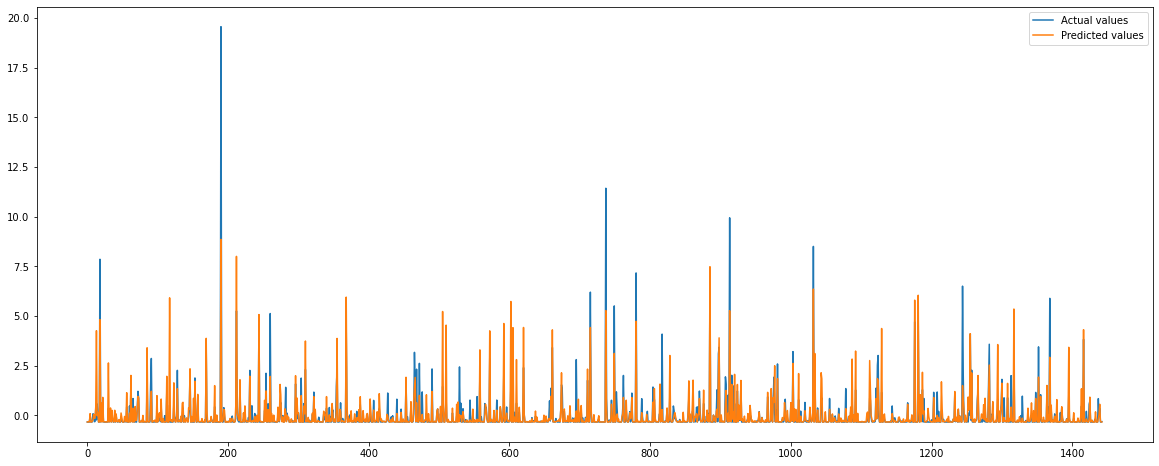

In [59]:
#Code by Sasha
# fitting the size of the plot
plt.figure(figsize=(20, 8))
# plotting the graphs
plt.plot([i for i in range(len(y_val))],y_val, label="Actual values")
plt.plot([i for i in range(len(y_val))],y_predicted, label="Predicted values")
# showing the plotting
plt.legend()
plt.show()

## <b>5<span style='color:#F76241'>|</span> Neural Network Model </b>

In [60]:
#Code by David
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)

tensorflow: 2.11.0


In [61]:
#Code by David
import keras
from keras.models import Sequential
from keras.layers import Dense
print('keras: %s' % keras.__version__)

keras: 2.11.0


In [62]:
#Code by David
print(f"The number of neurons for the input layer must be: {x_fit_train.shape[1]}")

The number of neurons for the input layer must be: 15


In [63]:
#Code by David
# define the neural network model class instance
movie_train_nn = Sequential()
movie_train_nn.add(Dense(8, input_dim=x_fit_train.shape[1], kernel_initializer='normal', activation='relu'))
movie_train_nn.add(Dense(8, kernel_initializer='normal', activation='relu')) #adding a second layer
movie_train_nn.add(Dense(1, kernel_initializer='normal')) #adding output layer

In [64]:
#Code by David
print(movie_train_nn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 128       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
#Code by David
movie_train_nn.compile(loss='mean_squared_error', optimizer='adam')

In [66]:
#Code by David
movie_train_nn.fit(x_fit_train, y_fit_train, epochs=100, batch_size = 32)

Epoch 1/100
181/181 [==============================] - 1s 2ms/step - loss: 0.8607
Epoch 2/100
181/181 [==============================] - 0s 2ms/step - loss: 0.5425
Epoch 3/100
181/181 [==============================] - 0s 1ms/step - loss: 0.4358
Epoch 4/100
181/181 [==============================] - 0s 1ms/step - loss: 0.3870
Epoch 5/100
181/181 [==============================] - 0s 1ms/step - loss: 0.3506
Epoch 6/100
181/181 [==============================] - 0s 2ms/step - loss: 0.3283
Epoch 7/100
181/181 [==============================] - 0s 2ms/step - loss: 0.3087
Epoch 8/100
181/181 [==============================] - 0s 1ms/step - loss: 0.3004
Epoch 9/100
181/181 [==============================] - 0s 1ms/step - loss: 0.2931
Epoch 10/100
181/181 [==============================] - 0s 1ms/step - loss: 0.2851
Epoch 11/100
181/181 [==============================] - 0s 1ms/step - loss: 0.2794
Epoch 12/100
181/181 [==============================] - 0s 1ms/step - loss: 0.2735
Epoch 13/100


In [67]:
#Code by David
#importing ggplot library
from plotnine import ggplot, aes, geom_point

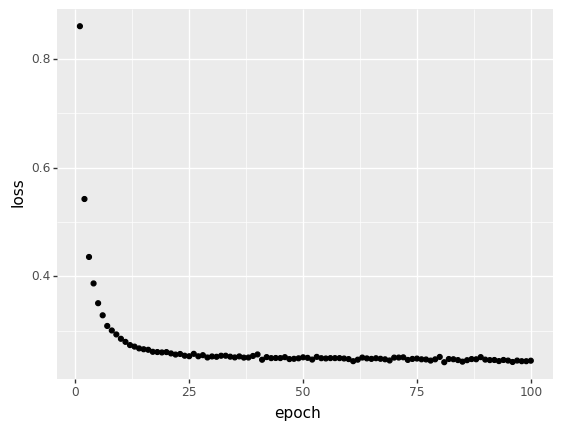

<ggplot: (143243171976)>

In [68]:
#Code by David - adopted from Ricardo Pinosio
# see what information has been logged during the training process
movie_train_nn.history.history.keys()

# plot the training loss over epochs
loss_df = pd.DataFrame(movie_train_nn.history.history['loss'])
loss_df.columns = ['loss']
loss_df = loss_df.assign(epoch = np.arange(1, 101))

(
    ggplot(loss_df, aes(x='epoch', y='loss')) +
    geom_point()
)

We can see from the above plot that the loss cost starts to become around stable aroung 25 after 25 epochs. However, we do not want to focus on the loss on this training set because it could be misleading and lead to overfitting and the loss on the validation set might be worse due to the fact that it has not seen this data before. Just to be sure, we would run the model on the validation data and see the loss after each epoch and the comparision would let us know if it overfits.

In [69]:
#Code by David - adopted from Ricardo Pinosio
#evaluating the neural network model on the validation data
movie_train_nn.fit(x_fit_train, y_fit_train, epochs=100, batch_size = 32, validation_data=(x_val, y_val))

Epoch 1/100
181/181 [==============================] - 1s 3ms/step - loss: 0.2465 - val_loss: 0.3687
Epoch 2/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2442 - val_loss: 0.3719
Epoch 3/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2444 - val_loss: 0.3712
Epoch 4/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2449 - val_loss: 0.3616
Epoch 5/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2448 - val_loss: 0.3754
Epoch 6/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2433 - val_loss: 0.3661
Epoch 7/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2398 - val_loss: 0.3612
Epoch 8/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2403 - val_loss: 0.3754
Epoch 9/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2433 - val_loss: 0.3731
Epoch 10/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2408 - val_lo

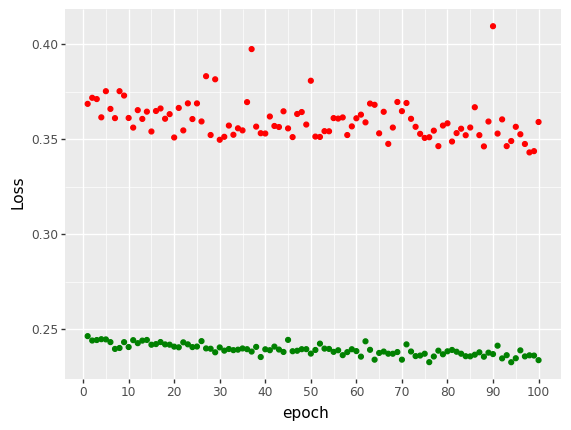

<ggplot: (143244312733)>

In [70]:
#Code by David - adopted from Ricardo Pinosio
# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, 101))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(movie_train_nn)

### <b>5.2<span style='color:#F76241'>|</span>Neural Network Hyperparameter tuning

In [71]:
#Code by David
from scikeras.wrappers import KerasRegressor

In [72]:
# function that creates the model
# note that we pass the number of neurons as a parameter to the network
def create_model(neurons=1):
    movie_model = Sequential()
    movie_model.add(Dense(neurons, input_dim=x_fit_train.shape[1], kernel_initializer='normal', activation='relu'))
    movie_model.add(Dense(neurons, kernel_initializer='normal', activation='relu')) #adding a second layer
    movie_model.add(Dense(neurons, kernel_initializer='normal'))
    movie_model.compile(loss='mean_squared_error', optimizer='adam')
    return movie_model

seed = 1234
np.random.seed(seed)

# turn the keras model into a sklearn compatible model
# note that the neurons parameter needs to be specified in the interface of KerasClassifier
model = KerasRegressor(build_fn=create_model, verbose=0, neurons=1)

In [73]:
#Code by David - adopted from Ricardo Pinosio
# define the grid search parameters
batch_size = [10, 15, 25, 32] #selecting the range of possible neurons
epochs = [15,25, 50, 75] #selecting the range of possible epochs
neurons = [8, 10, 15] #selecting the range of possible neurons
params_grid = dict(batch_size=batch_size, epochs=epochs, neurons=neurons)

In [74]:
#Code by David
params_grid

{'batch_size': [10, 15, 25, 32],
 'epochs': [15, 25, 50, 75],
 'neurons': [8, 10, 15]}

In [75]:
#Code by David
grid_search_nn = GridSearchCV(estimator=model, param_grid=params_grid, n_jobs=-1)
grid_search_nn = grid_search_nn.fit(x_fit, y_fit)

c:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
c:\Users\User\Anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.


In [77]:
#Code by David
print("The best parameter combination is: {} with score: {}".format(grid_search_nn.best_params_, grid_search_nn.best_score_))

The best parameter combination is: {'batch_size': 10, 'epochs': 15, 'neurons': 8} with score: nan


In [78]:
#Code by David - adopted from Ricardo Pinosio
#using the hyperparameters from the gridsearch, we now train our neural network on the fitted dataset
movie_best_nn = Sequential()
movie_best_nn.add(Dense(8, input_dim=x_fit.shape[1], kernel_initializer='normal', activation='relu'))
movie_best_nn.add(Dense(8, kernel_initializer='normal', activation='relu'))
movie_best_nn.add(Dense(1, kernel_initializer='normal'))
movie_best_nn.compile(loss='mean_squared_error', optimizer='adam')
movie_best_nn.fit(x_fit, y_fit, epochs= 15 , batch_size = 10, verbose=0)
y_hat_test_nn = movie_best_nn.predict(x_test)

57/57 [==============================] - 0s 1ms/step


In [83]:
# R2 corresponds to the squared correlation between the observed outcome values. Higher the R-squared, the better the model.
print('R^2:', metrics.r2_score(y_test, y_hat_test_nn))

# It assesses the average squared difference between the observed and predicted
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_hat_test_nn))

# The lower the RMSE, the better the model. measures the average error in predicting the outcome for an observation.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_hat_test_nn, squared=False))

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_hat_test_nn))

R^2: 0.6141480747263671
Mean Squared Error (MSE): 0.38585192527363277
Root Mean Squared Error (RMSE): 0.6211698038971573
Mean Absolute Error (MAE): 0.17528552811657827


In [84]:
movie_best_nn.fit(x_fit, y_fit, epochs=100, batch_size = 32, validation_data=(x_test, y_test))

Epoch 1/100
226/226 [==============================] - 1s 3ms/step - loss: 0.2759 - val_loss: 0.3913
Epoch 2/100
226/226 [==============================] - 0s 2ms/step - loss: 0.2729 - val_loss: 0.3827
Epoch 3/100
226/226 [==============================] - 0s 2ms/step - loss: 0.2726 - val_loss: 0.3913
Epoch 4/100
226/226 [==============================] - 0s 2ms/step - loss: 0.2718 - val_loss: 0.3849
Epoch 5/100
226/226 [==============================] - 0s 2ms/step - loss: 0.2708 - val_loss: 0.3977
Epoch 6/100
226/226 [==============================] - 0s 2ms/step - loss: 0.2737 - val_loss: 0.3847
Epoch 7/100
226/226 [==============================] - 0s 2ms/step - loss: 0.2777 - val_loss: 0.3896
Epoch 8/100
226/226 [==============================] - 0s 2ms/step - loss: 0.2756 - val_loss: 0.3872
Epoch 9/100
226/226 [==============================] - 0s 2ms/step - loss: 0.2744 - val_loss: 0.3889
Epoch 10/100
226/226 [==============================] - 0s 2ms/step - loss: 0.2735 - val_lo

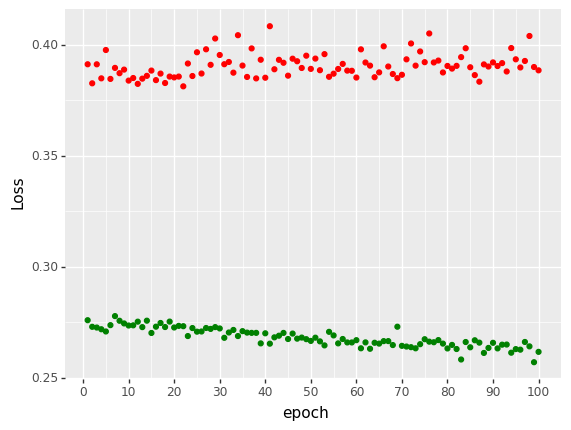

<ggplot: (143248217766)>

In [85]:
# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, 101))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(movie_best_nn)

# <b>6 <span style='color:#F76241'>|</span> Bonus linear/logistic regression and KNN </b>

In [86]:
#Code by Sasha
# multiple linear regression
Input = df[['metascore', 'theatre_count']]
Output = df['worldwide_box_office']

regr = linear_model.LinearRegression()
regr.fit(Input, Output)

#enter the variables seen aboveit will output the predicted box office sale based on linear regression:
predicted_Box_Office = regr.predict([[80, 100]])
print("The predicted box office is : ", predicted_Box_Office)

The predicted box office is :  [33580108.29578197]


c:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


In [87]:
#Code by Sasha
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [88]:
#Code by Sasha
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_fit_train, y_fit_train)  #fit the model
    pred=model.predict(x_val) #make prediction on test set
    error = sqrt(mean_squared_error(y_val,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.7415175879159082
RMSE value for k=  2 is: 0.7239004012956142
RMSE value for k=  3 is: 0.696258425256072
RMSE value for k=  4 is: 0.7025861267894931
RMSE value for k=  5 is: 0.6779426705833155
RMSE value for k=  6 is: 0.680240416806368
RMSE value for k=  7 is: 0.6772546600773249
RMSE value for k=  8 is: 0.675108349943777
RMSE value for k=  9 is: 0.6783631416320274
RMSE value for k=  10 is: 0.6693083177461211
RMSE value for k=  11 is: 0.6582045613813453
RMSE value for k=  12 is: 0.6640380693139664
RMSE value for k=  13 is: 0.6702946001160154
RMSE value for k=  14 is: 0.6725105310846116
RMSE value for k=  15 is: 0.6760039937342275
RMSE value for k=  16 is: 0.6691944716035721
RMSE value for k=  17 is: 0.6667151969907485
RMSE value for k=  18 is: 0.6664795037336636
RMSE value for k=  19 is: 0.6723422168861527
RMSE value for k=  20 is: 0.6732533567194398


<AxesSubplot:>

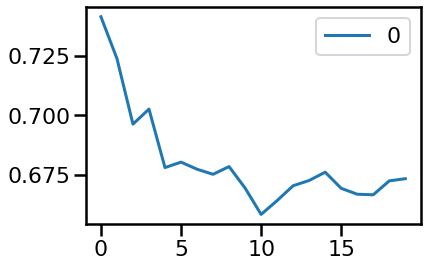

In [89]:
#Code by Sasha
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) 
#elbow curve 
curve.plot()

In [90]:
#import libary for KNN
from sklearn.neighbors import KNeighborsRegressor

In [91]:
## Initialize kNN with neighbors 8 as shown above in the plot
knn = KNeighborsRegressor(n_neighbors=4)

In [92]:
#create KNN fit with training set
knn.fit(x_fit_train, y_fit_train)
#check KNN score with validation set
knn.score(x_val, y_val)

0.5757942882003152

In [93]:
#Code by Sasha
#Predict Y based on x input create variable for prediction
knn_y_predicted = knn.predict(x_val)

In [94]:
from sklearn import metrics

# R2 corresponds to the squared correlation between the observed outcome values. Higher the R-squared, the better the model.
print('R^2:', metrics.r2_score(y_val, knn_y_predicted))

# It assesses the average squared difference between the observed and predicted
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_val, knn_y_predicted))

# The lower the RMSE, the better the model. measures the average error in predicting the outcome for an observation.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_val, knn_y_predicted, squared=False))

# absolute difference between observed and predicted outcomes. MAE is less sensitive to outliers compared to RMSE.
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_val, knn_y_predicted))

R^2: 0.5757942882003152
Mean Squared Error (MSE): 0.49362726555706155
Root Mean Squared Error (RMSE): 0.7025861267894931
Mean Absolute Error (MAE): 0.2198589138373757



# <b>7 <span style='color:#F76241'>|</span> Clustering mode </b>

### <b>7.1<span style='color:#F76241'>|</span>PCA

We do PCA because in the data it looks at the variables with a low variance and uses those features and then reuses the dataset. We do this because it simplifies the complexity in high-dimensional data while retaining trends and patterns. It transforms data into fewer dimensions. It acts as summaries of features.

In [95]:
#Code by Melissa - adopted from Debarati Bhaumik 
## Performing PCA
from sklearn.decomposition import PCA
pca = PCA()
pca_comps = pca.fit_transform(df_train_scaled) # pca components
var_exp = pca.explained_variance_ratio_ # variance explained ratio 
cum_var_exp = np.cumsum(var_exp) # cumulative variance

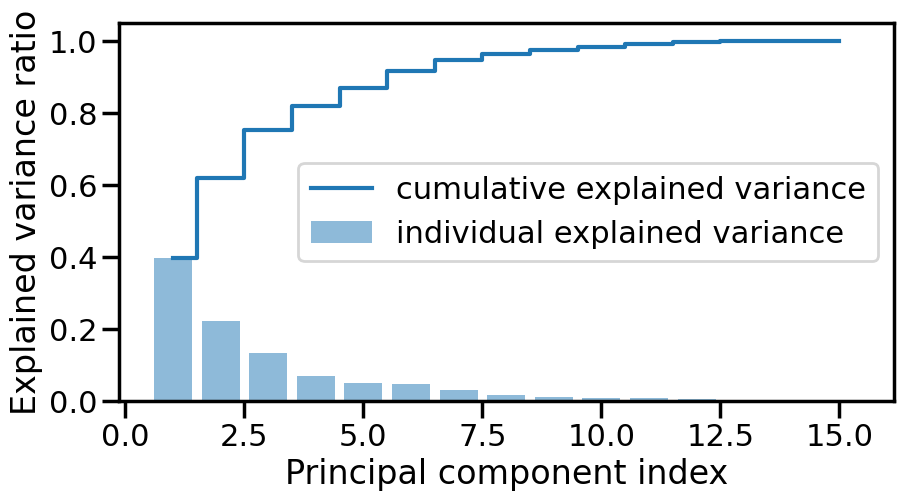

In [96]:
#Code by Melissa - adopted from Debarati Bhaumik
# plot of explained variances
fig = plt.figure(figsize=(10, 5), dpi=100)
plt.bar(range(1,len(var_exp)+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,len(var_exp)+1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [97]:
#Code by Melissa - adopted from Debarati Bhaumik
var_exp_thres = 0.8

#calling pcs instance with desired variance explained threshold
pca = PCA(var_exp_thres)  
pca_comps = pca.fit_transform(df_train_scaled)  
print('Number of components to explain {:0.0f}% variance is {}'.format(var_exp_thres*100, pca.n_components_))

Number of components to explain 80% variance is 4


As we can see above the number of components is 4, determining that that is the amount of the features we will have.

In [98]:
#Code by Melissa
df_train_scaled

array([[ 1.90552595, -1.21304009, -0.91680071, ...,  0.        ,
         0.        ,  0.        ],
       [-0.61641325,  1.12890731,  0.59619847, ...,  0.        ,
         0.        ,  1.        ],
       [-0.61641325,  0.48487177, -0.91680071, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.16750556, -2.26691642, -3.1862995 , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.37988154, -0.45190718,  0.59619847, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16365527, -0.74465061, -0.16030112, ...,  0.        ,
         0.        ,  0.        ]])

In [99]:
#Code by Melissa - adopted from Debarati Bhaumik
pca_comps

array([[ 2.34851852,  1.12351904,  0.08455383, -0.12920844],
       [-1.44215657, -0.01297965,  0.37888598, -0.49771972],
       [ 0.06417029, -0.70231332,  0.90688768, -0.68876434],
       ...,
       [ 3.44331026, -1.84546409,  0.44422386, -0.02055902],
       [ 1.19035098,  2.38551071, -0.28716272, -0.10067214],
       [ 0.7341352 ,  0.00886569, -0.3988417 , -0.04037238]])

In [100]:
#Code by Melissa - adopted from Debarati Bhaumik
#Here we can see which the most important features are
most_important_features_idx = [np.abs(pca.components_[i]).argmax() for i in range(pca.n_components_)]
most_important_features = df.columns[most_important_features_idx]

print('The most important features are:', most_important_features.values)

The most important features are: ['metascore' 'theatre_count' 'metascore' 'is_comedy']


Above can be seen the 3 most important features are metascore, theatre count and worldwide box office

### <b>7.3<span style='color:#F76241'>|</span> K-Means
On the important Principal Components (PCs)
We use this one because in the pca it was shown that metascore and theatre count are the most important features but we would still like to include the other features like genre.

In [124]:
#Code by Melissa - adopted from Debarati Bhaumik
# Importing the libraries kmeans, clustering and elbow method
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer 

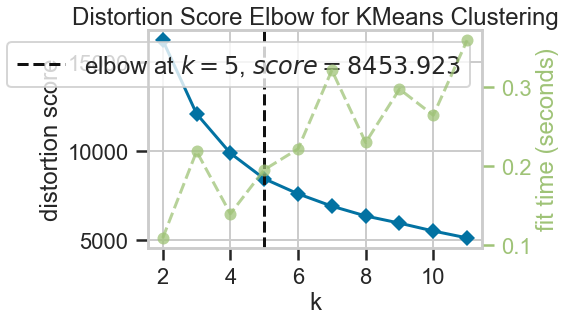

The best cluster number is: 5


In [125]:
#Code by Melissa - adopted from Debarati Bhaumik
## performing the elbow method
# Instantiate the clustering model and visualizer
kmeans = KMeans() # you should remove the random_state in general. This is done for demonstration purposes.
visualizer = KElbowVisualizer(kmeans, k=(2,12))
visualizer.fit(pca_comps)        #Fit the important PCA component data to the visualizer
visualizer.show()        # Finalize and render the figure
print('The best cluster number is:', visualizer.elbow_value_) # Get elbow value

In [126]:
#Code by Melissa - adopted from Debarati Bhaumik
# Performing the KMeans on 5 clusters for PCs 
km = KMeans(n_clusters=5) #5 is how many clusters you want
kmeans_best_cluster = KMeans(n_clusters=visualizer.elbow_value_)
kmeans_best_cluster.fit(pca_comps)
#saving the cluster labels
cluster_labels_PCs = kmeans_best_cluster.labels_

### <b>7.2.2<span style='color:#F76241'>|</span> Most important features

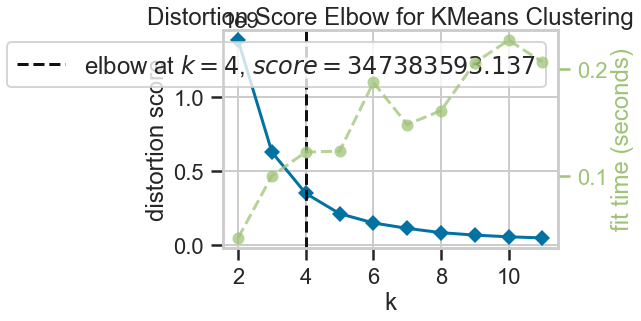

The best cluster number is: 4


In [127]:
#Code by Melissa - adopted from Debarati Bhaumik
# Instantiate the clustering model and visualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,12))
visualizer.fit(df[most_important_features])        # Fit the important features data to the visualizer
visualizer.show()        # Finalize and render the figure
visualizer.elbow_value_ # Get elbow value
print('The best cluster number is:', visualizer.elbow_value_) # Get elbow value

In [128]:
#Code by Melissa - adopted from Debarati Bhaumik
# Performing the KMeans on 5 clusters for most important features
km = KMeans(n_clusters=5)
kmeans_best_cluster = KMeans(n_clusters=visualizer.elbow_value_)
kmeans_best_cluster.fit(df[most_important_features])
#saving the cluster labels
cluster_labels_ImpFeatures = kmeans_best_cluster.labels_

In [129]:
#Code by Melissa - adopted from Debarati Bhaumik
#To check whether the kmeans best cluster is working correctly
kmeans_best_cluster.labels_

array([2, 1, 2, ..., 1, 1, 1])

In [130]:
#Code by Melissa
#The new column of clusters was added to the data
df['cluster-Kmeans'] = kmeans_best_cluster.labels_
df.head()

,theatre_count,metascore,userscore,worldwide_box_office,is_comedy,is_drama,is_thriller,is_documentary,is_action,is_other_genre,is_ifc_films,is_universal_pictures,is_warner_bros,is_sony_pictures,is_paramount_pictures,is_other_studios,cluster,cluster-Kmeans
0,2433,31,8,17865209,0,0,0,0,0,1,0,0,0,0,0,1,0,2
1,1,68,7,3053,0,1,0,0,0,0,0,0,0,0,0,1,1,1
2,2411,35,8,46060861,0,1,0,0,0,0,0,0,1,0,0,0,0,2
3,1,49,6,3053,0,1,0,0,0,0,1,0,0,0,0,0,1,1
4,2470,41,6,25044057,1,0,0,0,0,0,0,0,0,0,0,1,0,2


In [131]:
#Code by Melissa - adopted from Debarati Bhaumik
#to examine if the maximum in the new cluster-kmeans column is 4, because we have 5 clusters
df.describe() 

,theatre_count,metascore,userscore,worldwide_box_office,is_comedy,is_drama,is_thriller,is_documentary,is_action,is_other_genre,is_ifc_films,is_universal_pictures,is_warner_bros,is_sony_pictures,is_paramount_pictures,is_other_studios,cluster,cluster-Kmeans
count,9014.000000,9014.000000,9014.000000,9.014000e+03,9014.000000,9014.000000,9014.0,9014.000000,9014.000000,9014.000000,9014.000000,9014.000000,9014.000000,9014.000000,9014.000000,9014.000000,9014.000000,9014.000000
mean,797.160084,56.807300,6.210339,4.689537e+07,0.135900,0.356667,0.0,0.152319,0.066008,0.289106,0.062015,0.035944,0.031285,0.029399,0.028178,0.830486,1.075327,1.198025
std,1293.491254,17.075524,1.335997,1.410069e+08,0.342701,0.479042,0.0,0.359349,0.248311,0.453372,0.241196,0.186161,0.174096,0.168931,0.165491,0.418821,0.716719,0.668308
min,1.000000,1.000000,0.000000,1.200000e+01,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,45.000000,6.000000,3.053000e+03,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,4.000000,58.000000,7.000000,5.931285e+05,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1709.250000,70.000000,7.000000,2.634214e+07,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,4725.000000,100.000000,9.000000,2.845900e+09,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000


### <b>7.3<span style='color:#F76241'>|</span> Evaluation of the cluster models
The models are evaluated to determine which model is performed the kmeans better. The Silhouette score is used to identify how good the clustering technique is. The Davies Bouldin index is used to determine whether the average similarity between the clusters is high or low.

In [132]:
#Code by Melissa - adopted from Debarati Bhaumik
sc = []
dbi = []

#metrics from imporant components from PCA method
sc.append(metrics.silhouette_score(pca_comps, cluster_labels_PCs, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(pca_comps, cluster_labels_PCs))

#metrics from imporant features from PCA method
sc.append(metrics.silhouette_score(df[most_important_features], cluster_labels_ImpFeatures, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(df[most_important_features], cluster_labels_ImpFeatures))

Kmeans_methods = ['Kmean_on_PCs', 'Kmean_on_ImpFeatures']

# Creating a pandas dataframe
d = {'silhouette_score': sc, 'DBI': dbi, 'Kmeans_methods':Kmeans_methods }
df_metrics = pd.DataFrame(d)
df_metrics.set_index('Kmeans_methods', inplace = True)
df_metrics

,silhouette_score,DBI
Kmeans_methods,,
Kmean_on_PCs,0.299512,1.127737
Kmean_on_ImpFeatures,0.829738,0.480832


K-Means Findings:
- **Silhouette Coefficient** When it comes to the kmeans of the components the score is 0.2 closer to 0 meaning the clusters are indifferent. In terms of the important feautures the score is 0.8 is close to 1, from this we can interpret that the clusters are well apart from each other. 
- **Davies Bouldin Index** The index of 1.2 of the components indicates that the average similarity is higher than that of the important features which is 0.5 The lower the average similarity is the better the results will be of the clustering. 

From this we can conclude that the important feature cluster model performs better with our data.

### <b>7.4<span style='color:#F76241'>|</span>Visualizing and plotting the clusters

In [133]:
#Code by Melissa
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

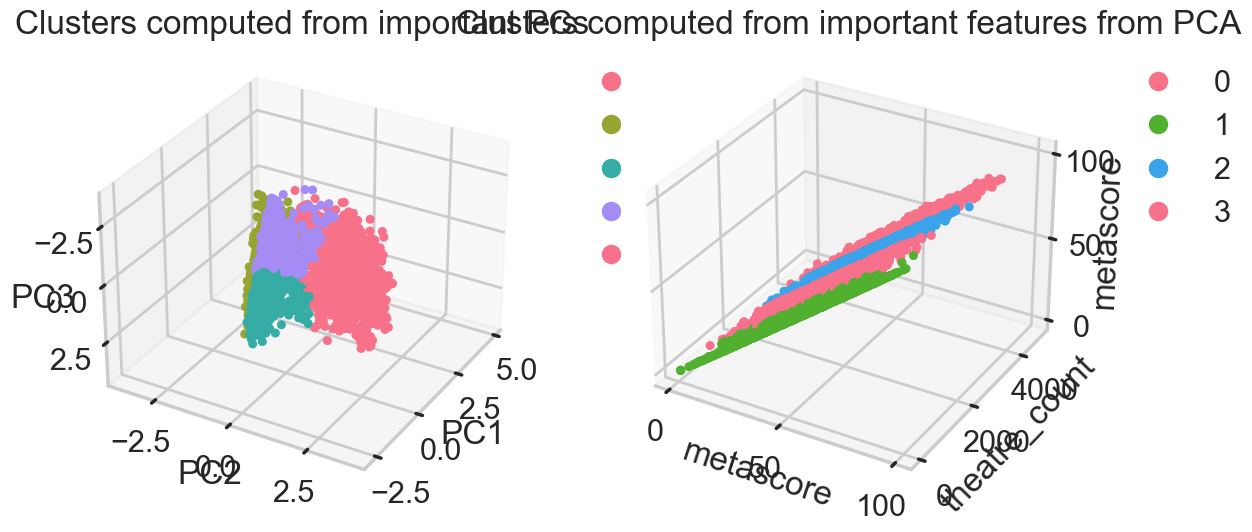

In [134]:
#Code by Melissa - adopted from Debarati Bhaumik
## Let us visualize how the clusters look on the first 3 PCs and 3 important fearures computed from the two methods

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

fig = plt.figure(figsize=(20, 7.5), dpi=100)

# set up the axes for the first plot
ax = fig.add_subplot(1, 3, 1, projection='3d')
sc = ax.scatter(pca_comps[:,0],pca_comps[:,1],pca_comps[:,2], c = cluster_labels_PCs, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Clusters computed from important PCs')
ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.view_init(-150, -30)

# set up the axes for the second plot
ax = fig.add_subplot(1, 3, 2, projection='3d')
sc = ax.scatter(df[most_important_features[0]],df[most_important_features[1]],df[most_important_features[2]], 
                        c = cluster_labels_ImpFeatures, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel(most_important_features[0])
ax.set_ylabel(most_important_features[1])
ax.set_zlabel(most_important_features[2])
ax.set_title('Clusters computed from important features from PCA')
ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)


plt.show()

In [135]:
#Code by Melissa
#adding the cluster column to the original dataset
df['cluster'] = cluster_labels_ImpFeatures
df.head()

,theatre_count,metascore,userscore,worldwide_box_office,is_comedy,is_drama,is_thriller,is_documentary,is_action,is_other_genre,is_ifc_films,is_universal_pictures,is_warner_bros,is_sony_pictures,is_paramount_pictures,is_other_studios,cluster,cluster-Kmeans
0,2433,31,8,17865209,0,0,0,0,0,1,0,0,0,0,0,1,2,2
1,1,68,7,3053,0,1,0,0,0,0,0,0,0,0,0,1,1,1
2,2411,35,8,46060861,0,1,0,0,0,0,0,0,1,0,0,0,2,2
3,1,49,6,3053,0,1,0,0,0,0,1,0,0,0,0,0,1,1
4,2470,41,6,25044057,1,0,0,0,0,0,0,0,0,0,0,1,2,2


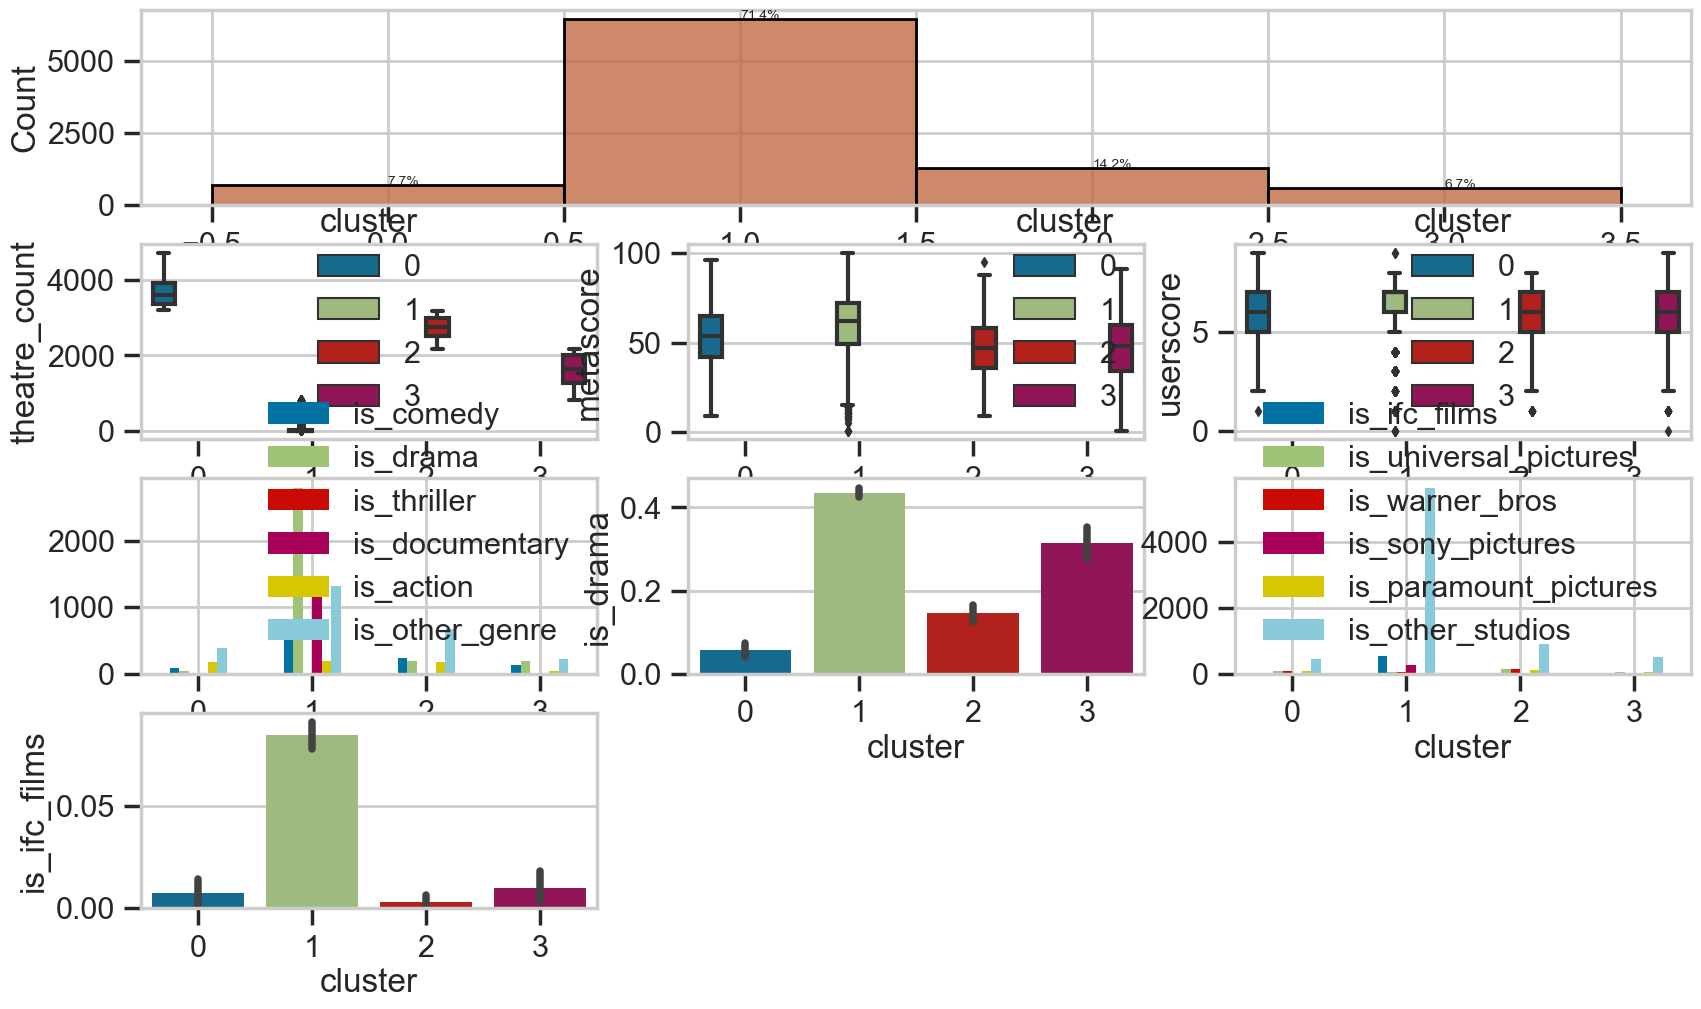

In [136]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(5,3)
fig = plt.figure(figsize=(20, 15), dpi=100)
ax1=fig.add_subplot(gs[0,:])
ax2=fig.add_subplot(gs[1,0])
ax3=fig.add_subplot(gs[1,1])
ax4=fig.add_subplot(gs[1,2])
ax5=fig.add_subplot(gs[2,0])
ax6=fig.add_subplot(gs[2,1])
ax7=fig.add_subplot(gs[2,2])
ax8=fig.add_subplot(gs[3,0])


df['cluster'] = kmeans_best_cluster.labels_ 

# Cluster size
sns.histplot(data = df, x = "cluster", discrete = True, color = '#be6238', ax = ax1)
for p in ax1.patches:
    ax1.annotate('{:.1f}%'.format((p.get_height()/len(df))*100), (p.get_x() + 0.5, p.get_height() + 10), fontsize=10)


# theatre count per cluster
sns.boxplot(data=df, x='cluster', y='theatre_count', hue='cluster', ax = ax2)

#metascore size per cluster 
sns.boxplot(data=df, y= 'metascore', hue="cluster", x="cluster", ax = ax3)


# userscore per cluster
sns.boxplot(data=df, y='userscore',hue='cluster', x='cluster', ax = ax4)

#  Genres per cluster
genres = df.groupby("cluster")[['is_comedy', 'is_drama', 'is_thriller', 'is_documentary', 'is_action', 'is_other_genre']].sum()
genres.plot(kind='bar', rot=0, ax = ax5)

# Highest performing genre
sns.barplot(data=df, y='is_drama', x='cluster', ax = ax6)

#  Studios per cluster
studios = df.groupby("cluster")[['is_ifc_films', 'is_universal_pictures', 'is_warner_bros', 'is_sony_pictures', 'is_paramount_pictures', 'is_other_studios']].sum()
studios.plot(kind='bar', rot=0, ax = ax7)

# Highest performing studio
sns.barplot(data=df, y='is_ifc_films', x='cluster', ax = ax8)

plt.show()

#### Cluster Findings
These are the clusters that were identified and this is how the features divide into the different clusters. Cluster no.1 is the biggest size at a percentage of 71.3%. For genres cluster 1 is showing that drama is the highest grossing one following with genre documentary. The lowest one is the genre action in all clusters. For the feature studio it is IFC Films is the highest in all clusters.

## <b>8 <span style='color:#F76241'>|</span> HDBSCAN </b>

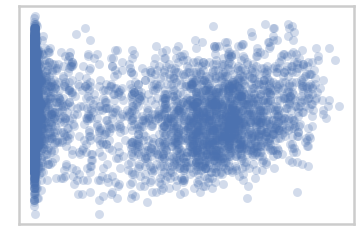

In [137]:
#Code by Maher
import sklearn.cluster as cluster
import time
import hdbscan

#visualize data by plotting a graph to see any clusters
data = df_train_scaled

%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

This code is creating two plots of clusters found by two different algorithms (KMeans and HDBSCAN) applied to a set of data stored in the file 'clusterable_data.npy'. The first plot is created using np.load() to load the data, then plt.scatter() to create the plot with the data points. The second plot is created by calling the function plot_clusters(). This function takes the data, an algorithm, and arguments and keywords as parameters, and uses them to find clusters in the data and create a plot of those clusters. The plots are created without the axes being visible, and the title and text of the plots are also modified.

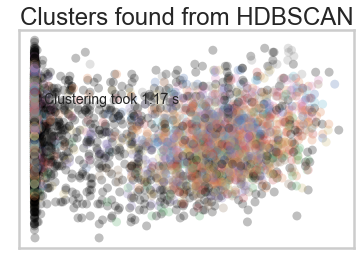

In [138]:
# Code by Maher
# clustering with HDBSCAN, does not show any groups clearly separated from each other, the data is visually messy.
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found from {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

data = df_train_scaled

plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':5})

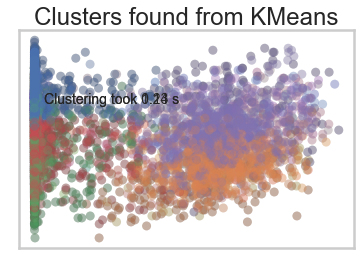

In [139]:
# Code by Maher
# Clustering with K-MEANS shows that the data is grouped up better in separate clusters. 
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':5})
plot_clusters(data, cluster.KMeans, (), {'n_clusters':5})

**The K-Means** algorithm performed surprisingly well on our test dataset. It was able to identify the 4 natural clusters and accurately assign a lot of points to the correct cluster. The clusters were not separated too much but enough to indicate that the algorithm was able to pick up on some of the subtle differences between the clusters. Overall, the K-Means algorithm was able to successfully identify the clusters in our test dataset.

### <b><span style='color:#F76241'>|</span> Conclusion
Multiple machine learning models have been performed to answer the main question. The machine learning models are compared on standardized metrics. RMSE was chosen because it not only calculates how close the prediction is to the actual value on average, but it also indicates the effect of large errors. The R2 score to get the accuracy of your model on a percentage scale. MAE It is the absolute average distance of our model prediction. MSE the average squared difference between the observed and predicted. Random Forest received the best scores. See below the summary;



**Random forest**, R2 0.71, MSE 0.28, RMSE 0.53, MAE 0.20 ~

**Neural Network**, R2 0.61, MSE 0.39, RMSE 0.62, MAE 0.18 ~

**KNN model**, R2 0.68, MSE 0.33, RMSE 0.58, MAE 0.21

From the cluster modeling we can conclude that most important features are the genre, theater count and meta score.

Theatre count has a coefficient 0.72 showing a strong positive correlation with world wild box office. Meta score has a score of 0.05 which is a weak correlation with world wide box office, showing that it has no effect on the revenues. Genre and studios also have an effect on the revenues on a movie. The highest performing genre in the clusters is Drama and for studios is IFC films

## <span style='color:#F76241'>|</span>Bibliography
<br> 1) Brownlee, J.(2020, August 25). How To Improve Neural Network Stability and Modeling Performance with Data Scaling https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
<br> 2) Leland M., John H., Steve A.(2016) Comparing Python Clustering Algorithms Revision 109797c7 https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html#comparing-python-clustering-algorithms
<br> 3) 
<br> 4) 

## <span style='color:#F76241'>|</span>Reflection on Processes and Teamwork in Group 9


#### *SASHA KOHLER* - 500780734

**Individual reflection on project:** <br>
For the past 2 weeks, we worked on the project since the beginning i have been present almost every day in the lecture and other projects that i am proud of,  I learned a lot about machine learning, which from the outside seems like a very difficult concept, but it's not that bad. Although SKLearn's libarys are very helpful. What I regret about this is that I haven't been able to focus on the other parts of machine learning.


**Reflection on group collaboration:** <br>
When we received the assignment we immediately started with the group to make the report. I divided the tasks in the beginning so Maher and Melissa got clustering, David got the part about neural network and I got about random forest. Because random forest was explained first, I could start with this myself right away. I asked the teacher if this was the best way to distribute work he agreed. The group was very strong in terms of communication and we were quick to get to everything

**Melissa Dhanpal** <br>
Tips: I notice that if you find it difficult to stay focused and trying to avoid to make mistakes, try to remember that you learn from mistakes and that sometimes you have to jump into the deep to learn more.

Tops: I notice that you want to learn, because of this you are very active in class, which is pleasant to work with. You are involved with problems we have and are not afraid to ask for help.

**David Andrew** <br>
Tips:  David you are present and want to take responsibility for everything, try to divide this more and address others more on their lesser sides. This gives you a better overview and allows you to focus more on your own work.

Tops: You are a real team player, this is because of your helpfulness, which makes you pleasant to work with. I can also count on you throughout the project to finish your work, you say what you do and you will come far if you keep going like this! Keep up the great work!

**Maher Aarab** <br>
Tips: Try to be more present so that others can count on you, if you cannot be present, try to keep up with it via online tools.

Tops: You are smart, so you absorb the knowledge quickly, I can discuss with you what needs to be done, and you don't let yourself be distracted from the end goal. Very solution oriented thinker.

#### *DAVID ANDREW* - 500903075

**Individual reflection on project:** <br>
I felt it was going to be challenging but I was ready for it. I just convinced myself that I had to put in the work and learn it. I had high and low moments where I didn't understand a lot but it got better. It became more fun solving our business question using this model. A lot of personal study and collaboration also helped me understand the concepts better. However, because I was more focused on neural network and couldn't learn more about the other clusters.

**Reflection on group collaboration:** <br>
The group was very dynamic and everyone exchanged ideas from day 1. We immediately started planning and shared the tasks among ourselves. We also met regularly to discuss and track our progress. However, a team member was very ill for a week but he managed to support remotely. Asides from the project, we also got to learn more about each other

**Melissa Dhanpal** <br>
Melissa is very vibrant and helped us stay in track with our business questions based on her business background. She did not have a very strong coding strength but was very brave in asking questions and took it upon herself to learn more, research and eventually coded her part herself. You could see the desire to learn. She was also fun member of the team which helped to improve team spirit. I would advise she work more on improving on python

**Sasha Köhler** <br>
Sasha was very calm and very quick to respond. I appreciated his communication and dedication to the project. He was also very efficient as he delivered when he said he would. He knows how to apply python but could work more on learning more on the concepts being used.

**Maher Aarab** <br>
Maher is sharp and analyses problems quickly. He also knows how to translate problems in clear and concise way. He also finds solutions quickly. Maher could also do more improving his python skills.

#### *MELISSA DHANPAL* - 500903075

**Individual & Group reflection on project & group:**
Overall for the past weeks this course was extremely new to me and very challenging. But with the support of my group I got through it. It took a lot of effort, team work and concentration. A tip for myself is to be a better listener and be a better team player.

**Sasha Kohler**
Tips: Could create a better balance between independent work and team tasks. But he was also always asking to support everyone, so in many ways he was already on the right track.

Tops: Takes great initiative and is a quick learner. Likes to work ahead and is always ready to support and help any member.

**David Andrew**
Tips: Is already a great member, but because he likes to help everyone could possibly ignore his own needs. But I already believe he as the perfect balance.

Tops: Is great at keeping the team together and focused. Is a great leader and very efficient. Great team member

**Maher Aarab**
Tips: Not much to add on his part, because he is a great member but could be more initiative. Which he for the majority already, but there is always room for improvement.

Tops: Very understanding and great communicator is always ready to support any time and anywhere more support is needed.

#### *MAHER AARAB* - 500787737

**Individual reflection on project:**

In this module I sadly have missed a lot of classes due to catching a heavy cold. I tried to keep up with the classes to read the theory at home which did not really work out, so I had to count on my teammates to help out with the parts that I missed. I think I made some progress in machine-learning but I would not say that I am not adept at it right now. I definitely need some more practice and work in different models. I would definitely delve more into it if I get the chance to apply it at my thesis

Reflection on group collaboration:
The group was starting really early with the work even though we did not know everything, David and Sasha could start early with the EDA and made a head start with that. The assignment got shared between the group members. Me and Melissa caught a cold at the start, so we started a later than the other 2 members.

**David Andrew**

Tips: David could be more forgiving and outsource more tasks to other, he takes work on which could be done by others as well which are less busy. Maybe it is because of is sense of responsibility. 

Tops: I have worked with David before and David is a good example of a team-player. You can always count on him, he also takes his time to do his tasks which he then does well.

**Sasha Kohler**

Tips: Could be more including to make others understand the other parts as well. 

Tops: Focusses on his work and is able to deliver his part on time. Is also questioning others on their work and what he can learn from them.

**Melissa Dhanpal**

Tips: Do not be holding back your opinion like I say it can backfire if you think you cannot say anything you want, because it could lead to a good conclusion.

Tops: You can count on Melissa to challenge you on your opinions which is what I definitely need sometimes, otherwise I say whatever pops up in my mind immediately. Which is good because discussions could lead to conclusions and answers